##### QUESTION 2

In [129]:
# import the necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

#import the titanic dataset
titanic = pd.read_csv('titanic3.csv')
#display the first 5 rows of the dataset
display(titanic.head())

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


C:\Users\STUDENT\AppData\Local\Temp\ipykernel_26272\1513725133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_kept['age'] = titanic_kept['age'].fillna(titanic_kept['age'].mean())
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_26272\1513725133.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_kept['survived'] = titanic_kept['survived'].fillna(titanic_kept['survived'].mode()[0])


Accuracy: 0.8464476699770818
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       809
           1       0.85      0.73      0.78       500

    accuracy                           0.85      1309
   macro avg       0.85      0.82      0.83      1309
weighted avg       0.85      0.85      0.84      1309



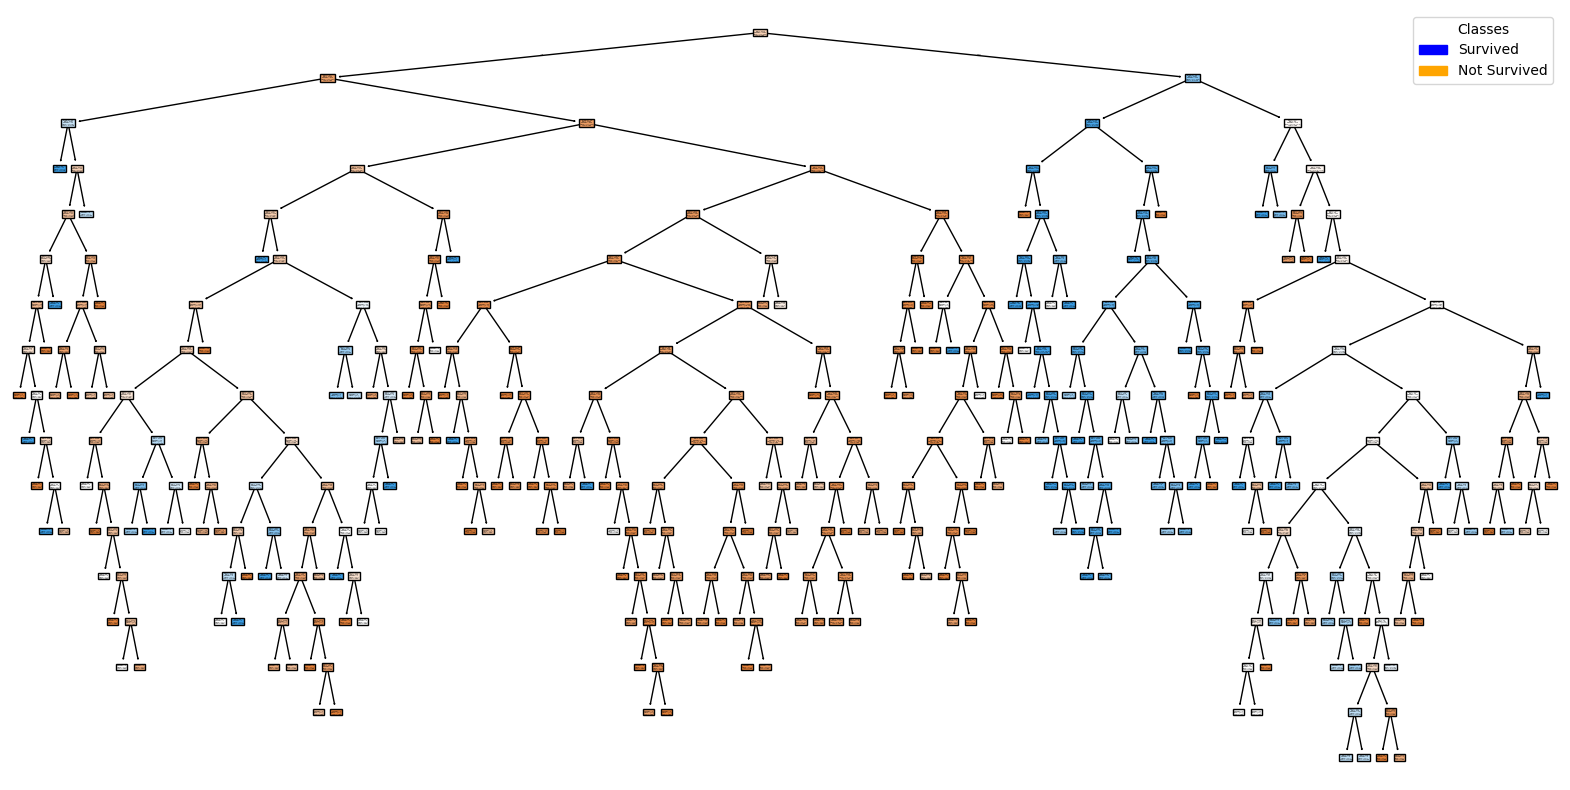

Misclassification Error: 0.15355233002291824
Cross Validation Score: [0.50763359 0.75954198 0.67557252 0.66412214 0.63601533]
Cross Validation Score: [0.50763359 0.75954198 0.67557252 0.66412214 0.63601533]
In-Sample Misclassification Error: 0.15355233002291824
Initial Misclassification Error: 0.3514228890643737


In [130]:
#load the titanic   dataset
titanic = pd.read_csv('titanic3.csv')

# keep the necessary columns and drop the rest 
# keep age, sex, pclass, survived
titanic_kept = titanic [['age', 'sex', 'pclass', 'survived']]

#make a copy of the dataset
titanic_copy = titanic_kept.copy()

#fill in missing values
titanic_kept['age'] = titanic_kept['age'].fillna(titanic_kept['age'].mean())
titanic_kept['survived'] = titanic_kept['survived'].fillna(titanic_kept['survived'].mode()[0])

#converting sex column into a binary column
titanic_kept.loc[:, 'sex'] = titanic_kept['sex'].map({'male': 0, 'female': 1})                 

#fit a decision tree model
#features
X = titanic_kept[['age', 'sex', 'pclass']]
#target
y = titanic_kept['survived']

#fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)

#evaluate the model
#accuracy
accuracy = model.score(X, y)
print(f"Accuracy: {accuracy}")

#print the classification report
y_pred = model.predict(X)
print(classification_report(y, y_pred))

#plot the decision tree
plt.figure(figsize=(20,10))
plt.title('Decision Tree Classifier')
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'])
import matplotlib.patches as mpatches

# Create legend handles
survived_patch = mpatches.Patch(color='blue', label='Survived')
not_survived_patch = mpatches.Patch(color='orange', label='Not Survived')

# Add legend to the plot
plt.legend(handles=[survived_patch, not_survived_patch], title='Classes')
plt.show()

#misclassification error scorer
#misclassification error = 1 - accuracy
misclassification_error = 1 - accuracy
print(f"Misclassification Error: {misclassification_error}")

#cross validation score
cross_val = cross_val_score(model, X, y, cv=5)
print(f"Cross Validation Score: {cross_val}")

#perform cross validation
cross_val = cross_val_score(model, X, y, cv=5)
print(f"Cross Validation Score: {cross_val}")

#in-sample misclassification error
in_sample_error = 1 - accuracy
print(f"In-Sample Misclassification Error: {in_sample_error}")

#initial misclassification error for comparison
initial_error = 1 - cross_val.mean()
print(f"Initial Misclassification Error: {initial_error}")

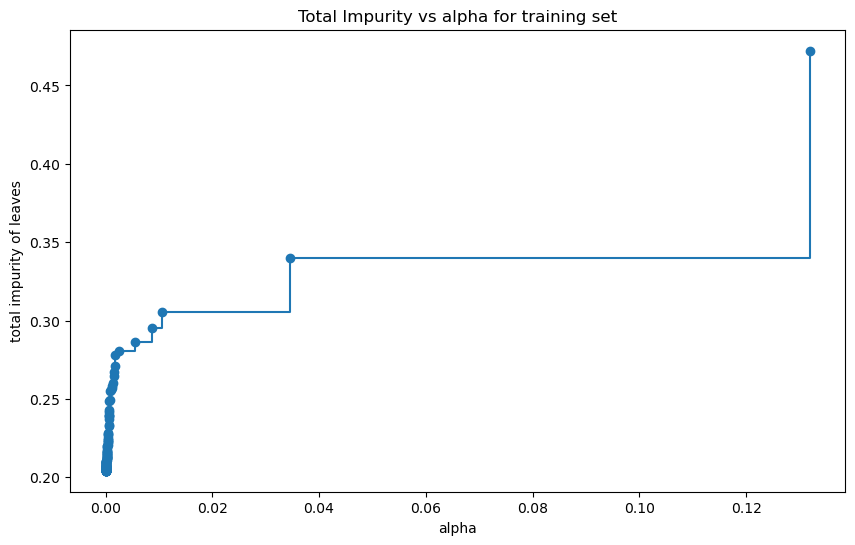

Best alpha: 0.0010630758327427395


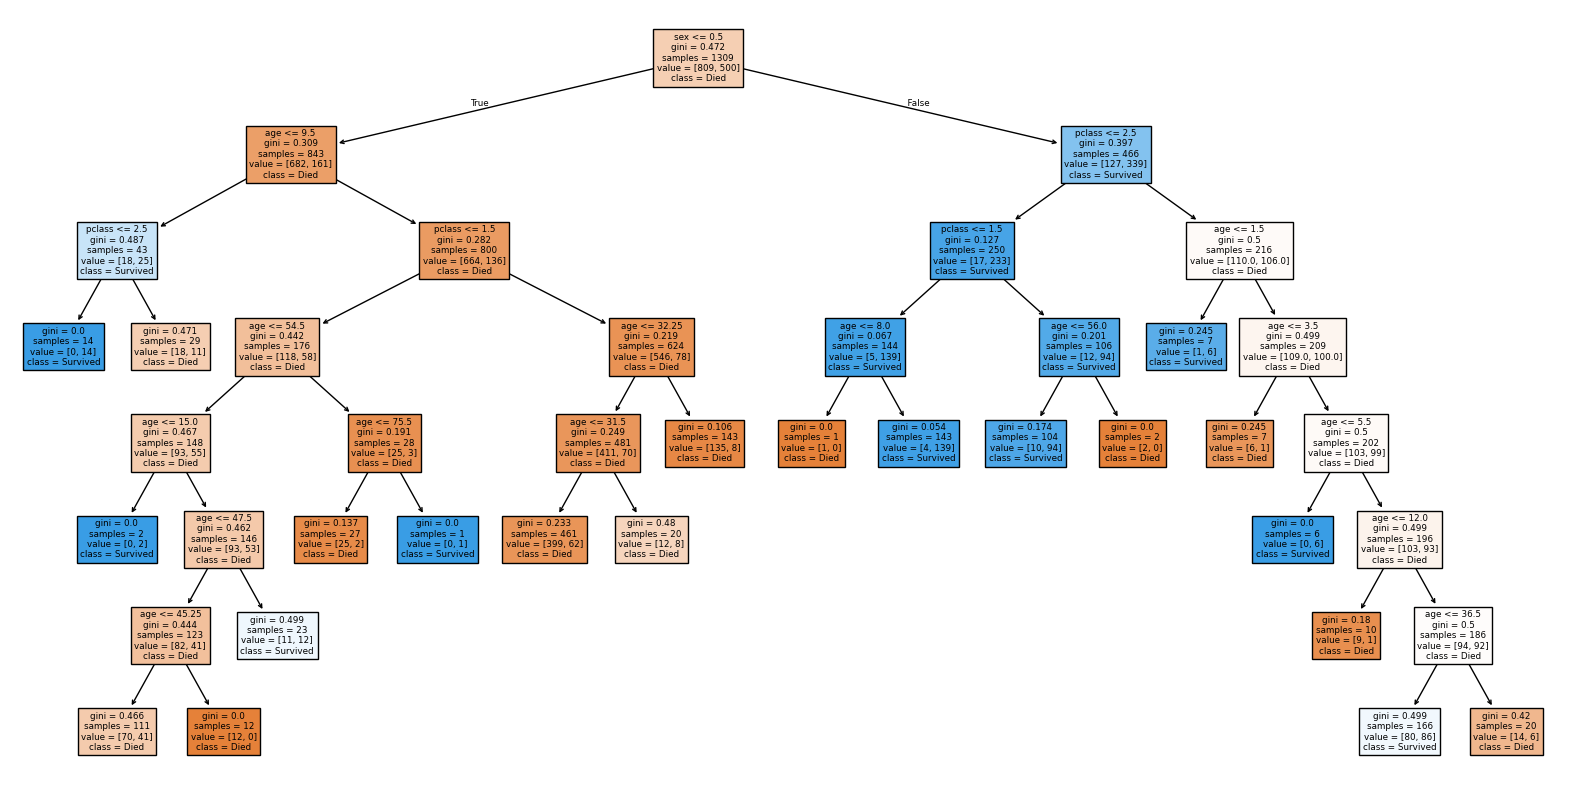

Accuracy: 0.812070282658518
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       809
           1       0.77      0.72      0.75       500

    accuracy                           0.81      1309
   macro avg       0.80      0.79      0.80      1309
weighted avg       0.81      0.81      0.81      1309

Misclassification Error: 0.187929717341482
Cross Validation Score: [0.51526718 0.83206107 0.78244275 0.66793893 0.63218391]


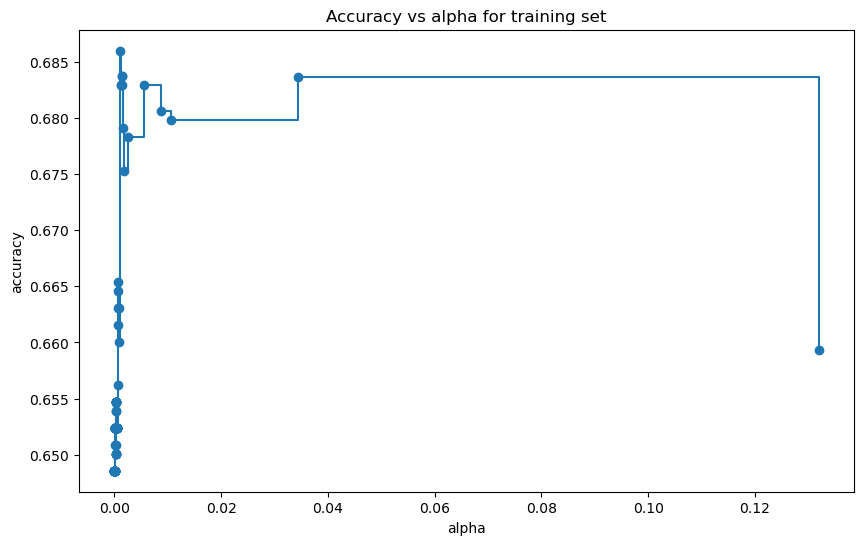

In-Sample Misclassification Error: 0.187929717341482
Initial Misclassification Error: 0.3140212336579802
Pruned model is better than the initial model


In [131]:
# Pruning the decision tree
#computing the pruning patch
pruning_patch = model.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = pruning_patch.ccp_alphas, pruning_patch.impurities

# plot the relationship between alpha and the impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('total impurity of leaves')
plt.title('Total Impurity vs alpha for training set')
plt.show()

# find the best alpha during cross-validation
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)

# evaluate and find the best alpha
alpha_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X, y, cv=5)
    alpha_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])

best_alpha = max(alpha_scores, key=lambda x: x[1])[0]
print(f"Best alpha: {best_alpha}")

#fit the model with the best alpha
pruned_model = DecisionTreeClassifier(ccp_alpha=best_alpha)
pruned_model.fit(X, y)

#plot the pruned decision tree
plt.figure(figsize=(20,10))
plt.title('Pruned Decision Tree Classifier')
plot_tree(pruned_model, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.show()

#evaluate the pruned model
#accuracy
accuracy = pruned_model.score(X, y)
print(f"Accuracy: {accuracy}")

#print the classification report
y_pred = pruned_model.predict(X)
print(classification_report(y, y_pred))

#misclassification error scorer
#misclassification error = 1 - accuracy
misclassification_error = 1 - accuracy
print(f"Misclassification Error: {misclassification_error}")

#cross validation score
cross_val = cross_val_score(pruned_model, X, y, cv=5)
print(f"Cross Validation Score: {cross_val}")

#plot accuracy vs alpha
alphas = [alpha[0] for alpha in alpha_scores]
accuracies = [alpha[1] for alpha in alpha_scores]
plt.figure(figsize=(10, 6))
plt.plot(alphas, accuracies, marker='o', drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Accuracy vs alpha for training set')
plt.show()

#compare the pruned model with the initial model
#in-sample misclassification error
in_sample_error = 1 - accuracy
print(f"In-Sample Misclassification Error: {in_sample_error}")

#initial misclassification error for comparison
initial_error = 1 - cross_val.mean()
print(f"Initial Misclassification Error: {initial_error}")

#compare the pruned model with the initial model
if in_sample_error < initial_error:
    print("Pruned model is better than the initial model")
else:
    print("Initial model is better than the pruned model")

        

In [132]:
from sklearn.impute import SimpleImputer

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# logistic regression
# define the model cross-validation strategy
model = LogisticRegression(max_iter=1000)

# train and evaluate the model using cross-validation
cv_accuracy = cross_val_score(model, X_imputed, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_accuracy}")
# print the mean cross-validation accuracy
print(f"Mean Cross-Validation Accuracy: {cv_accuracy.mean()}")

# fit the model on the entire dataset
model.fit(X_imputed, y)

# make the predictions
y_pred = model.predict(X_imputed)

# evaluate the model
# accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# print the classification report
print(classification_report(y, y_pred))


Cross-Validation Accuracy: [0.52290076 0.82442748 0.80152672 0.70610687 0.65900383]
Mean Cross-Validation Accuracy: 0.7027931326957386
Accuracy: 0.7853323147440795
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       809
           1       0.74      0.68      0.71       500

    accuracy                           0.79      1309
   macro avg       0.77      0.77      0.77      1309
weighted avg       0.78      0.79      0.78      1309



##### QUESTION 3

In [133]:
titanic_copy['age'] = titanic_copy['age'].fillna(titanic_copy['age'].mean())

# features
x = titanic_copy[['age', 'pclass', 'sex']]
# target
y = titanic_copy['survived'].astype(int)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ('cat', OneHotEncoder(), ['sex', 'pclass'])
    ])

# create a pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# transform the features
x = pipe.fit_transform(x)

#checking the transformed data head
print(x[:5])
print(x)


[[-0.06842049  1.          0.          1.          0.          0.        ]
 [-2.24883736  0.          1.          1.          0.          0.        ]
 [-2.16497518  1.          0.          1.          0.          0.        ]
 [ 0.00922968  0.          1.          1.          0.          0.        ]
 [-0.37902119  1.          0.          1.          0.          0.        ]]
[[-0.06842049  1.          0.          1.          0.          0.        ]
 [-2.24883736  0.          1.          1.          0.          0.        ]
 [-2.16497518  1.          0.          1.          0.          0.        ]
 ...
 [-0.26254593  0.          1.          0.          0.          1.        ]
 [-0.22372084  0.          1.          0.          0.          1.        ]
 [-0.06842049  0.          1.          0.          0.          1.        ]]


In [134]:
#fit  with initial parameters
#initialize and fit the knn classifier
knn = KNeighborsClassifier()
knn.fit(x, y)

#make predictions on the test set
y_pred = knn.predict(x)

#evaluate the classifier
#accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

#print the classification report
print(classification_report(y, y_pred))


Accuracy: 0.8273491214667685
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       809
           1       0.85      0.66      0.75       500

    accuracy                           0.83      1309
   macro avg       0.83      0.80      0.81      1309
weighted avg       0.83      0.83      0.82      1309



In [135]:
#in-sample predictions
in_sample_error = 1 - accuracy
print(f"In-Sample Misclassification Error: {in_sample_error}")

# in-sample accuracy
in_sample_accuracy = accuracy_score(y, y_pred)
print(f"In-Sample Accuracy: {in_sample_accuracy}")

#resubstitution error
resubstitution_error = 1 - in_sample_accuracy
print(f"Resubstitution Error: {resubstitution_error}")



In-Sample Misclassification Error: 0.17265087853323147
In-Sample Accuracy: 0.8273491214667685
Resubstitution Error: 0.17265087853323147


In [136]:
#perform cross-validation
cross_val = cross_val_score(knn, x, y, cv=5)
print(f"Cross Validation Score: {cross_val}")

#mean cross-validation score
mean_cross_val = cross_val.mean()
print(f"Mean Cross-Validation Score: {mean_cross_val}")

#k-fold loss
k_fold_loss = 1 - mean_cross_val
print(f"K-Fold Loss: {k_fold_loss}")


Cross Validation Score: [0.51908397 0.80916031 0.51908397 0.71755725 0.651341  ]
Mean Cross-Validation Score: 0.6432452984703577
K-Fold Loss: 0.3567547015296423


In-Sample Misclassification Error: 0.19938884644766997
Optimal k: 17
Optimal Loss: 0.30180164370740836
In-Sample Loss at Optimal k: 0.19404125286478224
Cross-Validation Loss at Optimal k: 0.30180164370740836


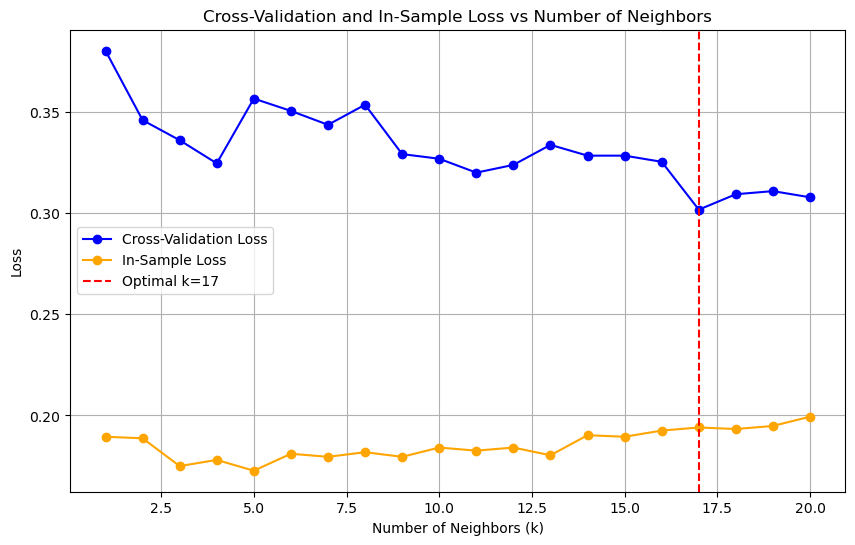

In [137]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize lists to store cross-validation errors and losses
cv_errors = []
cv_losses = []
train_errors = []
k_values = range(1, 21)

# Fit the KNN model for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    cv_score = cross_val_score(knn, x, y, cv=5).mean()
    cv_loss = 1 - cv_score  # Loss is 1 - accuracy
    cv_errors.append(1 - cv_score)
    cv_losses.append(cv_loss)
    
    # In-sample loss
    train_accuracy = knn.score(x, y)
    train_loss = 1 - train_accuracy
    train_errors.append(train_loss)

# In-sample predictions
y_pred = knn.predict(x)
accuracy = accuracy_score(y, y_pred)
in_sample_error = 1 - accuracy
print(f"In-Sample Misclassification Error: {in_sample_error}")

# Identify the optimal k value
optimal_k = k_values[np.argmin(cv_losses)]
optimal_loss = min(cv_losses)
print(f"Optimal k: {optimal_k}")
print(f"Optimal Loss: {optimal_loss}")

# Calculate and print the in-sample loss at optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(x, y)
train_accuracy_optimal = knn_optimal.score(x, y)
train_loss_optimal = 1 - train_accuracy_optimal
print(f"In-Sample Loss at Optimal k: {train_loss_optimal}")

# Calculate and print the cross-validation loss at optimal k
cv_loss_optimal = 1 - cross_val_score(knn_optimal, x, y, cv=5).mean()
print(f"Cross-Validation Loss at Optimal k: {cv_loss_optimal}")

# Plot the relationship between k and loss
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_losses, marker='o', linestyle='-', color='b', label="Cross-Validation Loss")
plt.plot(k_values, train_errors, marker='o', linestyle='-', color='orange', label="In-Sample Loss")
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Optimal k={optimal_k}")
plt.title("Cross-Validation and In-Sample Loss vs Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


Euclidean Distance Cross-Validation Score: 0.6981983562925916
Manhattan Distance Cross-Validation Score: 0.6920885613173058
Chebyshev Distance Cross-Validation Score: 0.7004855078821912
Mahalanobis Distance Cross-Validation Score: 0.6859816910882981


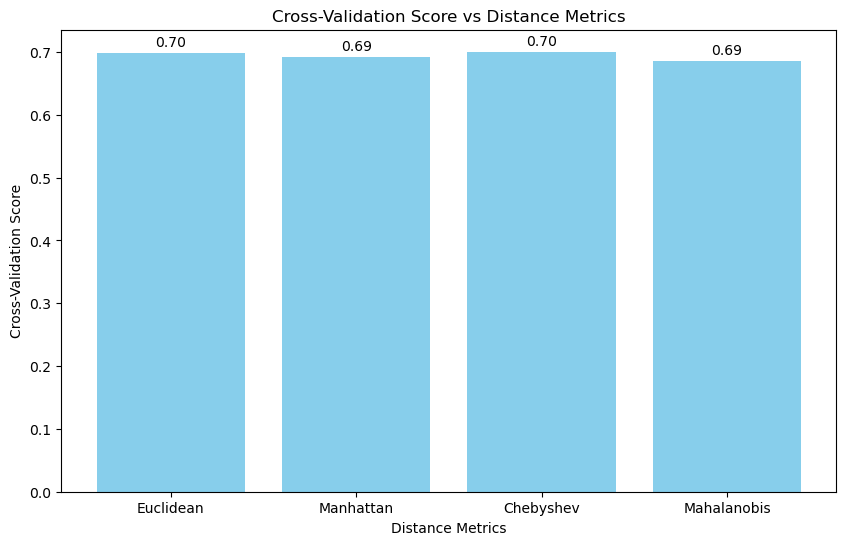

In [138]:
#evaluate knn with different distance metrics

#function to compute euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

#function to compute manhattan distance
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

#function to compute chebychev distance
def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2))

#function to compute mahalanobis distance
def mahalanobis_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

#regularized covariance matrix for mahalanobis distance
cov_matrix = np.cov(x, rowvar=False)
cov_matrix_reg = cov_matrix + 0.01 * np.eye(cov_matrix.shape[0])

#fit and evaluate the knn classifier with different distance metrics like euclidean, manhattan, chebyshev, and mahalanobis
#initialize the knn classifier with different distance metrics
knn_euclidean = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=optimal_k, metric='manhattan')
knn_chebyshev = KNeighborsClassifier(n_neighbors=optimal_k, metric='chebyshev')
knn_mahalanobis = KNeighborsClassifier(n_neighbors=optimal_k, metric='mahalanobis', metric_params={'V': cov_matrix_reg})

#fit the knn classifiers
knn_euclidean.fit(x, y)
knn_manhattan.fit(x, y)
knn_chebyshev.fit(x, y)
knn_mahalanobis.fit(x, y)

#cross-validation scores
cv_score_euclidean = cross_val_score(knn_euclidean, x, y, cv=5).mean()
cv_score_manhattan = cross_val_score(knn_manhattan, x, y, cv=5).mean()
cv_score_chebyshev = cross_val_score(knn_chebyshev, x, y, cv=5).mean()
cv_score_mahalanobis = cross_val_score(knn_mahalanobis, x, y, cv=5).mean()

# comparing all the distance metrics results
print(f"Euclidean Distance Cross-Validation Score: {cv_score_euclidean}")
print(f"Manhattan Distance Cross-Validation Score: {cv_score_manhattan}")
print(f"Chebyshev Distance Cross-Validation Score: {cv_score_chebyshev}")
print(f"Mahalanobis Distance Cross-Validation Score: {cv_score_mahalanobis}")

#visualizing the results
#plot the cross-validation scores
distances = ['Euclidean', 'Manhattan', 'Chebyshev', 'Mahalanobis']
cv_scores = [cv_score_euclidean, cv_score_manhattan, cv_score_chebyshev, cv_score_mahalanobis]

plt.figure(figsize=(10, 6))
plt.bar(distances, cv_scores, color='skyblue')
plt.xlabel('Distance Metrics')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Score vs Distance Metrics')
#print the cross-validation scores on each bar
for i, score in enumerate(cv_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center')
plt.show()


In [139]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_rel

# Function to evaluate a model
def evaluate_model(model, x, y, model_name):
    print(f"\n{model_name} Performance Metrics:")
    y_pred = model.predict(x)
    
    # Accuracy score
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Cross-validation scores for multiple metrics
    scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']
    for metric in scoring_metrics:
        score = cross_val_score(model, x, y, cv=5, scoring=metric).mean()
        print(f"{metric.capitalize()}: {score:.4f}")

# Fit and evaluate KNN with Chebyshev distance
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='chebyshev')
knn.fit(x, y)
evaluate_model(knn, x, y, "KNN with Chebyshev Distance")

# Fit and evaluate Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(x, y)
evaluate_model(model, x, y, "Logistic Regression")

# Perform t-test to compare KNN and Logistic Regression
t_stat, p_value = ttest_rel(knn.predict(x), model.predict(x))
print(f"\nStatistical Comparison (t-test):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Overall comparison
if p_value < 0.05:
    print("Logistic Regression model is statistically better than the KNN model.")
else:
    print("KNN model is statistically better than the Logistic Regression model.")



KNN with Chebyshev Distance Performance Metrics:
Accuracy: 0.8075
Accuracy: 0.7005
Precision: 0.6838
Recall: 0.5760
F1: 0.5432

Logistic Regression Performance Metrics:
Accuracy: 0.7846
Accuracy: 0.6211
Precision: 0.5086
Recall: 0.5180
F1: 0.4637

Statistical Comparison (t-test):
T-Statistic: -9.4030
P-Value: 0.0000
Logistic Regression model is statistically better than the KNN model.


##### QUESTION 4

In [140]:
# import the white win dataset
import pandas as pd
white = pd.read_csv('winequality-white.csv', delimiter= ';')
# import the red win dataset
red = pd.read_csv('winequality-red.csv', delimiter= ';')

# check the first few rows of the white wine dataset
display(white.head())
# check the first few rows of the red wine dataset
display(red.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [141]:
#import the necessary libraries for the analysis
import numpy as np
import matplotlib.pyplot as plt

# calculate the average of each feature in the white wine dataset
white_means = white.mean()
# calculate the average of each feature in the red wine dataset
red_means = red.mean()

# combine the averages into a dataframe
averages = pd.DataFrame({'white': white_means, 'red': red_means})
# display the averages
display(averages)


,white,red
fixed acidity,6.854788,8.319637
volatile acidity,0.278241,0.527821
citric acid,0.334192,0.270976
residual sugar,6.391415,2.538806
chlorides,0.045772,0.087467
free sulfur dioxide,35.308085,15.874922
total sulfur dioxide,138.360657,46.467792
density,0.994027,0.996747
pH,3.188267,3.311113
sulphates,0.489847,0.658149


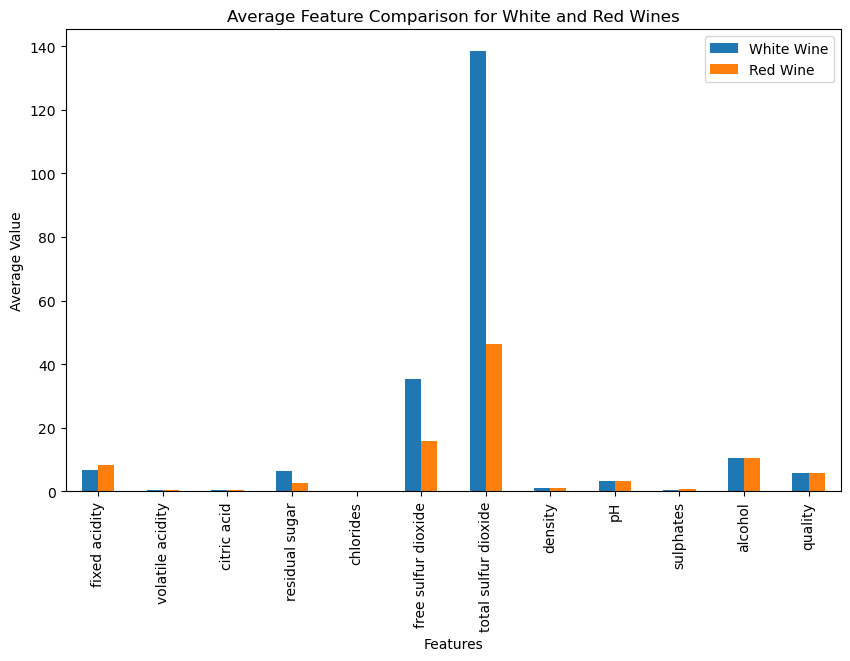

In [142]:
# Plot the bar graph
averages.plot(kind='bar', figsize=(10, 6))
plt.title('Average Feature Comparison for White and Red Wines')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.legend(['White Wine', 'Red Wine'])
plt.show()

In [143]:
# Correlation matrix for red wine
red_corr = red.corr()
red_corr_quality = red_corr['quality']


# Correlation matrix for white wine
white_corr = white.corr()
white_corr_quality = white_corr['quality']

# Creating a sorted list of all features from both datasets
features = set(red_corr_quality.index) & set(white_corr_quality.index)

# Create a DataFrame with both red and white wine correlation values
correlation_values = pd.DataFrame({'Red Wine': red_corr_quality, 'White Wine': white_corr_quality})

# Fill missing values with 0
correlation_values = correlation_values.fillna(0)

# Displaying the combined correlation table
display(correlation_values)


,Red Wine,White Wine
fixed acidity,0.124052,-0.113663
volatile acidity,-0.390558,-0.194723
citric acid,0.226373,-0.009209
residual sugar,0.013732,-0.097577
chlorides,-0.128907,-0.209934
free sulfur dioxide,-0.050656,0.008158
total sulfur dioxide,-0.185100,-0.174737
density,-0.174919,-0.307123
pH,-0.057731,0.099427
sulphates,0.251397,0.053678


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


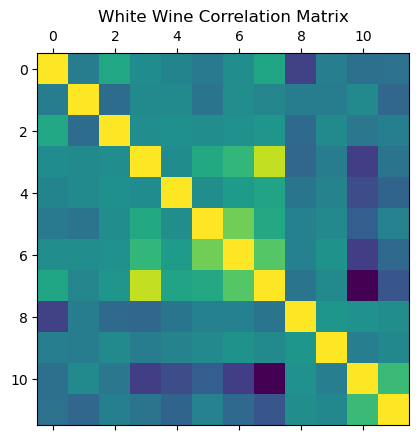

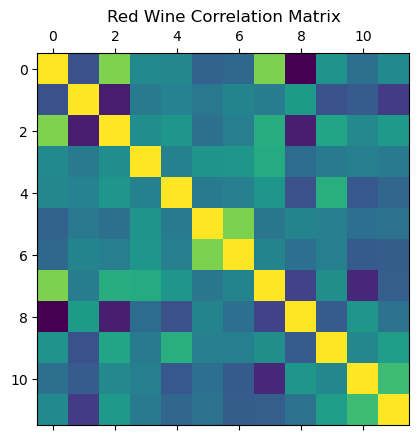

In [144]:
#calculate the correlation between the features in the white wine dataset
white_corr = white.corr()
#calculate the correlation between the features in the red wine dataset
red_corr = red.corr()

#print the correlation values
display(white_corr)
display(red_corr)

#combine the correlation matrices 

# Plot the correlation matrix for the white wine dataset with quality 
plt.matshow(white_corr)
plt.title('White Wine Correlation Matrix')
plt.show()

#plot the correlation matrix for the red wine dataset with quality
plt.matshow(red_corr)
plt.title('Red Wine Correlation Matrix')
plt.show()


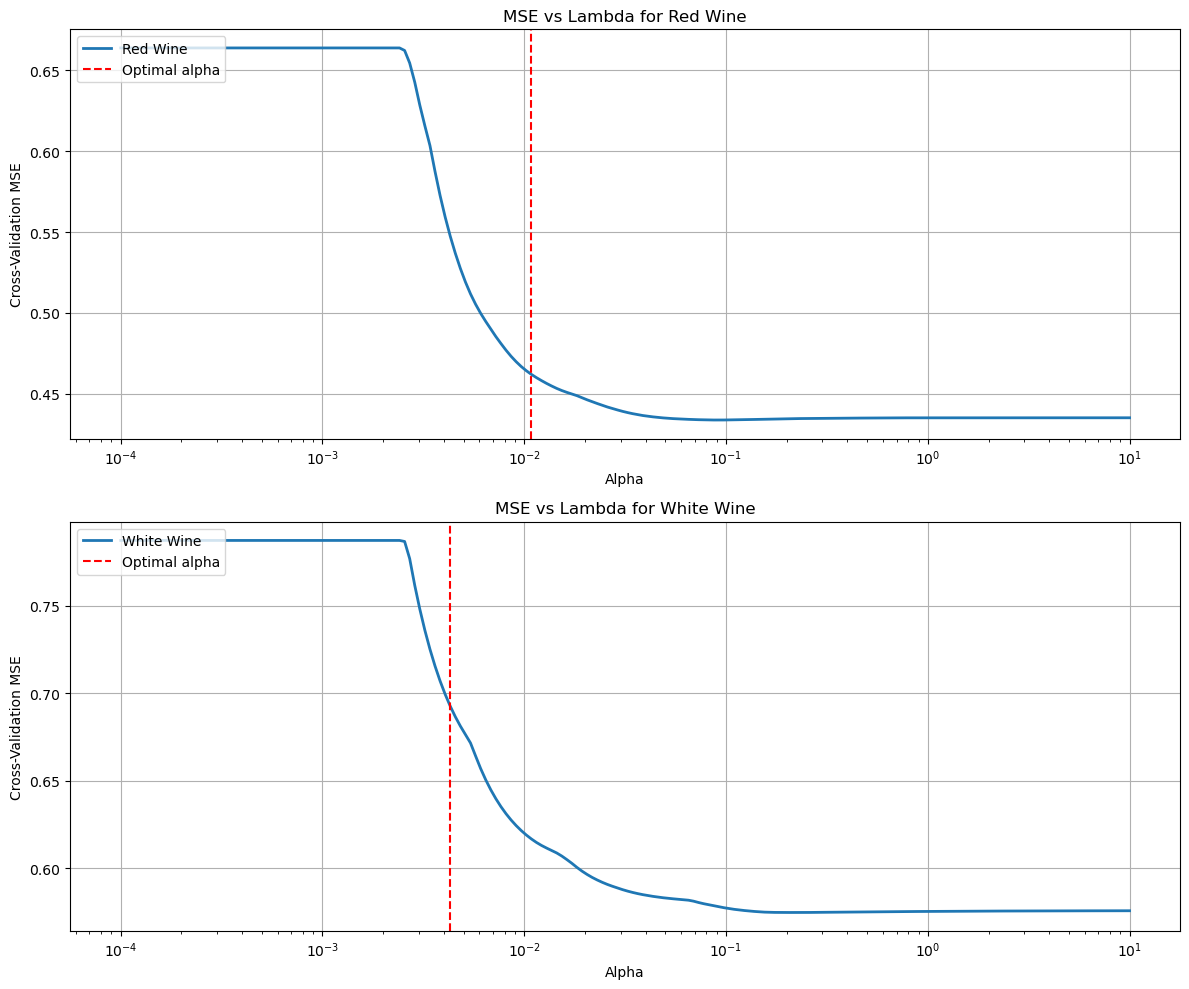

MSE for Red Wine: 0.4188
Best Alpha for Red Wine: 0.0108
MSE for White Wine: 0.5646
Best Alpha for White Wine: 0.0043


In [145]:
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LassoCV 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def lasso_analysis(data, wine_type, subplot_pos):
   # Separate features and target 
   X = data.drop(columns=['quality']) 
   y = data['quality'] 
    
   # Standardize features 
   scaler = StandardScaler() 
   X_scaled = scaler.fit_transform(X) 
    
   # Create more alpha values for smoother curve
   alphas = np.logspace(-4, 1, 200)  # Increased number of points for smoothness
   
   # Lasso regression with cross-validation 
   lasso = LassoCV(cv=10, alphas=alphas, random_state=0) 
   lasso.fit(X_scaled, y) 
    
   # Calculate MSE 
   y_pred = lasso.predict(X_scaled) 
   mse = mean_squared_error(y, y_pred) 

   # Create subplot
   plt.subplot(2, 1, subplot_pos)
   
   # Plot MSE against alpha with smoothed line
   plt.plot(alphas, 
            np.mean(lasso.mse_path_, axis=1),
            '-',  # Use solid line
            linewidth=2,
            label=f'{wine_type} Wine')
   
   # Add vertical line for best alpha
   plt.axvline(x=lasso.alpha_, color='r', linestyle='--', label='Optimal alpha')
   
   # Plot settings for subplot
   plt.xscale('log') 
   plt.xlabel('Alpha') 
   plt.ylabel('Cross-Validation MSE') 
   plt.title(f'MSE vs Lambda for {wine_type} Wine')
   plt.legend(loc='upper left')
   plt.grid(True)
   
   return mse, lasso.alpha_

# Set figure size
plt.figure(figsize=(12, 10))

# Run analysis for red and white wines separately
mse_red, best_alpha_red = lasso_analysis(red, "Red", 1)
mse_white, best_alpha_white = lasso_analysis(white, "White", 2)

plt.tight_layout()
plt.show()

# Print the MSE and best alpha for both wines 
print(f'MSE for Red Wine: {mse_red:.4f}')
print(f'Best Alpha for Red Wine: {best_alpha_red:.4f}')
print(f'MSE for White Wine: {mse_white:.4f}')
print(f'Best Alpha for White Wine: {best_alpha_white:.4f}')

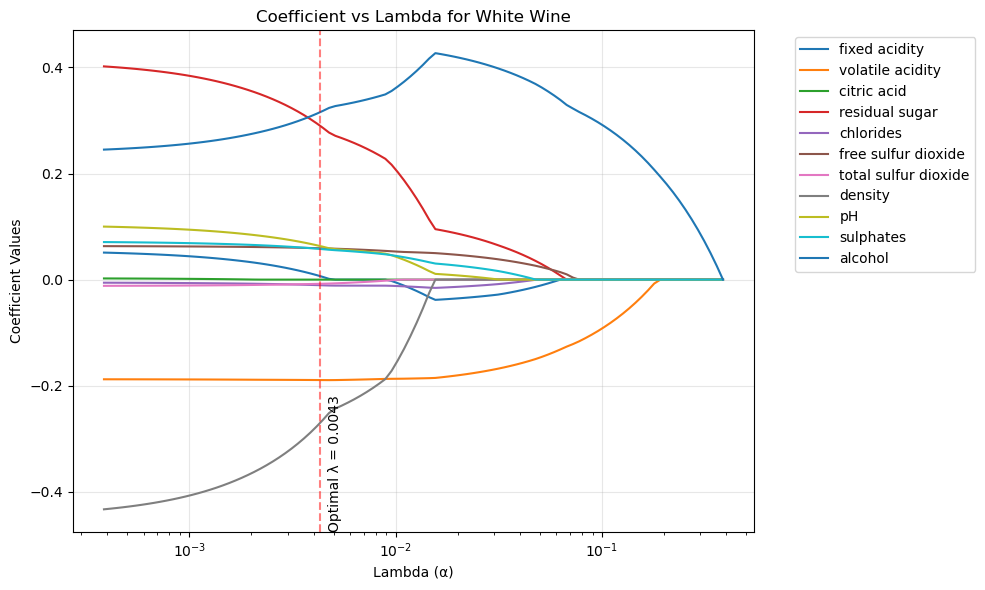


White Wine Lasso Model Performance:
MSE: 0.5646
R²: 0.2801

Selected Features (non-zero coefficients):
fixed acidity: 0.0071
volatile acidity: -0.1894
residual sugar: 0.2913
chlorides: -0.0105
free sulfur dioxide: 0.0591
total sulfur dioxide: -0.0078
density: -0.2721
pH: 0.0636
sulphates: 0.0579
alcohol: 0.3149


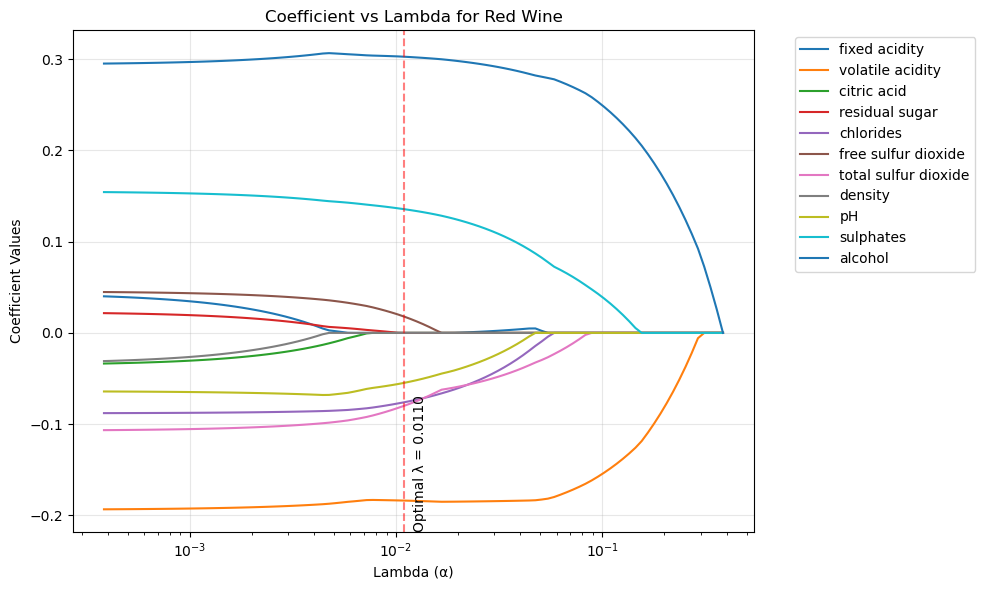


Red Wine Lasso Model Performance:
MSE: 0.4189
R²: 0.3574

Selected Features (non-zero coefficients):
volatile acidity: -0.1839
chlorides: -0.0760
free sulfur dioxide: 0.0178
total sulfur dioxide: -0.0798
pH: -0.0547
sulphates: 0.1356
alcohol: 0.3028


In [146]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def plot_coefficient_lambda(data, wine_type):
    # Separate features and target
    X = data.drop(columns=['quality'])
    y = data['quality']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Lasso regression with cross-validation
    lasso = LassoCV(cv=10, alphas=np.logspace(-4, 1, 50), random_state=0)
    lasso.fit(X_scaled, y)
    
    # Plot coefficient path
    plt.figure(figsize=(10, 6))
    alphas_lasso, coefs_lasso, _ = lasso.path(X_scaled, y)
    
    # Plot each coefficient
    for i, coef in enumerate(coefs_lasso):
        plt.plot(alphas_lasso, coef, label=X.columns[i])
    
    plt.xscale('log')
    plt.xlabel('Lambda (α)')
    plt.ylabel('Coefficient Values')
    plt.title(f'Coefficient vs Lambda for {wine_type} Wine')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    # Add vertical line at optimal alpha
    plt.axvline(x=lasso.alpha_, color='r', linestyle='--', alpha=0.5)
    plt.text(lasso.alpha_*1.1, plt.ylim()[0], f'Optimal λ = {lasso.alpha_:.4f}', 
             rotation=90, verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print model performance metrics
    y_pred = lasso.predict(X_scaled)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'\n{wine_type} Wine Lasso Model Performance:')
    print(f'MSE: {mse:.4f}')
    print(f'R²: {r2:.4f}')
    print('\nSelected Features (non-zero coefficients):')
    for feature, coef in zip(X.columns, lasso.coef_):
        if coef != 0:
            print(f'{feature}: {coef:.4f}')

# Run analysis separately for each wine type
plot_coefficient_lambda(white, "White")
plot_coefficient_lambda(red, "Red")

In [147]:
#import the necessary libraries for the analysis
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#print the features selected by the lasso regression for the red wine dataset
selected_features_red = ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
#separate the data using lasso selected features
X_red = red[selected_features_red]
y_red = red['quality']

#split the data into training and testing sets
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.2, random_state=0)

#standardize the features
scaler = StandardScaler()
X_train_scaled_red = scaler.fit_transform(X_train_red)
X_test_scaled_red = scaler.transform(X_test_red)

# Set up KNN with cross-validation to find the optimal number of neighbors
param_grid = {'n_neighbors': np.arange(1, 21)}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train_scaled_red, y_train_red)

# Best K value
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal number of neighbors (k): {best_k}")

# Train the final KNN model with the optimal number of neighbors
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train_scaled_red, y_train_red)

y_pred = knn_final.predict(X_test_scaled_red)
mse = mean_squared_error(y_test_red, y_pred)
mse = mean_squared_error(y_test_red, y_pred)
print(f"Mean Squared Error on test set: {mse}")

# calculate the r2 score
r2 = r2_score(y_test_red, y_pred)
print(f"R^2 Score on test set: {r2}")

# Output the model performance
print(f"Test set MSE with KNN (k={best_k}): {mse}")


Optimal number of neighbors (k): 20
Mean Squared Error on test set: 0.4273515625
R^2 Score on test set: 0.25348345274650286
Test set MSE with KNN (k=20): 0.4273515625


Mean Squared Error on test set: 0.3816179073237317
R^2 Score on test set: 0.33337301757164584
KNN model is better than the Linear Regression model


,Model,MSE,R^2
0,Linear Regression,0.381618,0.333373
1,KNN,0.427352,0.253483


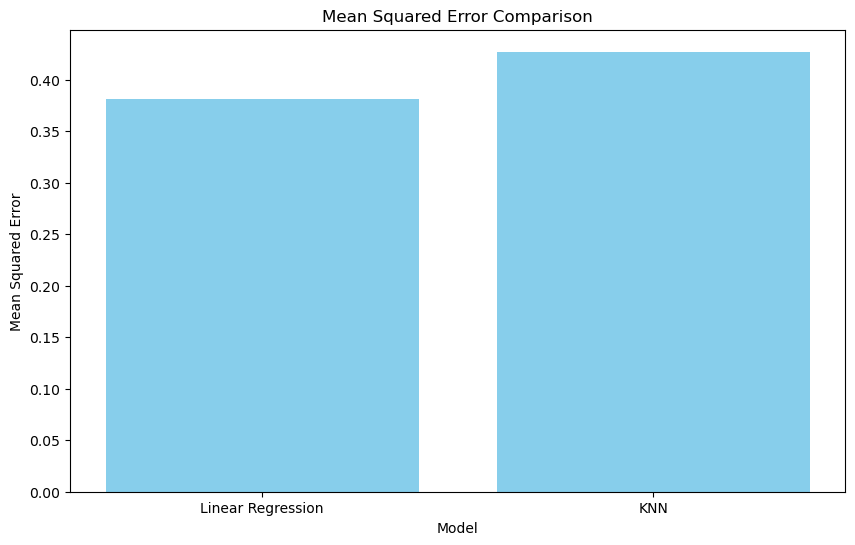

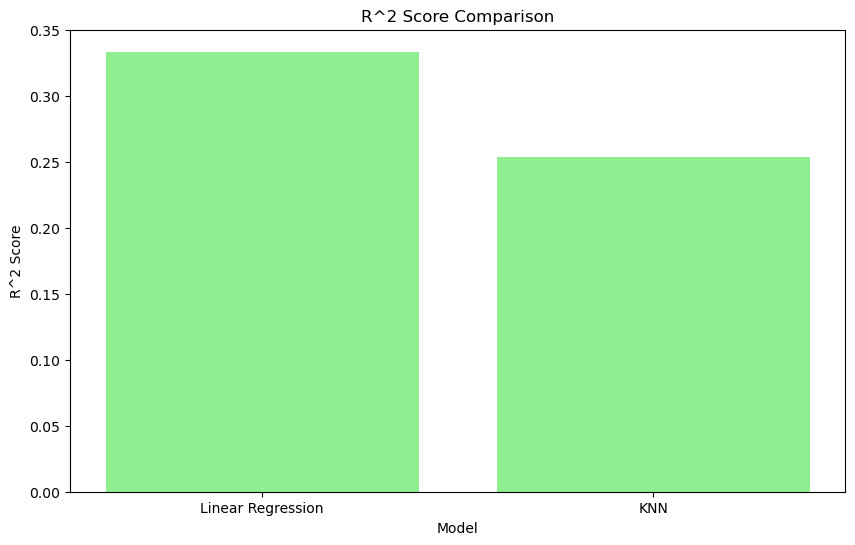

In [148]:
#initialize and fit the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled_red, y_train_red)

#make predictions
y_pred = model.predict(X_test_scaled_red)

#calculate the mean squared error
mse_lr = mean_squared_error(y_test_red, y_pred)
print(f"Mean Squared Error on test set: {mse_lr}")

#calculate the r2 score
r2_lr = r2_score(y_test_red, y_pred)
print(f"R^2 Score on test set: {r2_lr}")

#calculate the r2 score for the knn model
r2_knn = r2_score(y_test_red, knn_final.predict(X_test_scaled_red))

#compare the linear regression model with the knn model
if mse < mse_lr:
    print("Linear Regression model is better than the KNN model")
else:
    print("KNN model is better than the Linear Regression model")

#put the results in a dataframe
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN'],
    'MSE': [mse_lr, mse],
    'R^2': [r2_lr, r2_knn]
})

#display the results
display(results)

#create two bar plots to compare the mse and r2 scores of the two models
#plot the mse scores
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['MSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison')
plt.show()

#plot the r2 scores
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['R^2'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('R^2 Score Comparison')
plt.show()

